# Author: Pradip Kumar Murmu
## Task 6: Prediction using Decision Tree Algorithm

## GRIP @ The Sparks Foundation 


Decision Tree algorithm is supervised machine learning algorithm which is used for both classification and regression tasks. In the given task, I created the Decision Tree classifier and visualize it graphically using 'Iris' dataset. The Decision Tree classifier can take any new data, it would be able to predict the right class. 

# Technical Stack: Numpy array, Seaborn, Pandas, Scikit-Learn, Matplotlib, Pydot

In [46]:
#import important libraries

import pandas as pd # Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Seaborn

import matplotlib.pyplot as plt # Data plotting 
import pydot
from IPython.display import Image 

from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision Tree Algorithm
from sklearn.model_selection import train_test_split #For train-test Split
#for metrics evaluation
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import accuracy_score #accuracy 
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import ConfusionMatrixDisplay #confusion display

In [67]:
#Load the dataset local machine
data = pd.read_csv('Iris.csv')


In [69]:
#display the data top 5 records
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset consists of 6 columns in which 
* 5 columns( Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) are independent variables. 
* 1 column(Species) is a dependent variable.

In [70]:
# display the numbers of records and columns
data.shape

(150, 6)

### Datasets has 150 records and 6 columns

In [72]:
# Id columns in this dataset right now useless, therefore drop the column
data.drop(['Id'],axis=1, inplace=True)

In [73]:
#data summary
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### In this data summary parts we can see that, count, mean, standard deviation, minimum, percentile, and maximum value of this data.

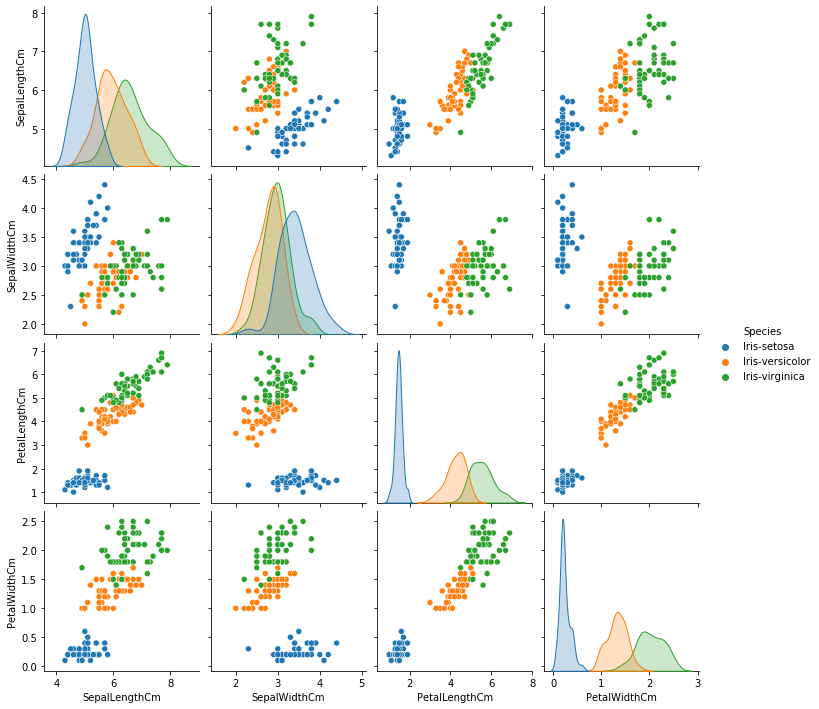

In [75]:
#visualize the relation between pair of variable using pairplot
sns.pairplot(data=data,hue='Species')

### From the above graph, It is clearly say that PetalLengthCm and SepalLenthCm are disguished better than other. 

# Data Preprocessing

In [81]:
#data preprocessing
#convert Species to 0,1,2
# Iris-setosa - 0, Iris-versicolor - 1, Iris-virginica - 2
species_class = list(data.Species.unique())
data['Species'].replace(species_class,[ x for x in range(len(species_class))],inplace=True)

In [54]:
#Splitting data set into train dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1], test_size=0.1, random_state=0)

# Data Modelling

### In this particular data, I used Decision Tree classification algorithm using entropy.
## Entropy : Entropy is measure of randomness.

In [55]:
#Decision Tree classifier 
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(x_train, y_train)
print('Training Complete.')
y_pred = dt_classifier.predict(x_test) 

Training Complete.


# Compare the Actual output and Predicted output

In [56]:
df = pd.DataFrame({'Actual output':y_test,
                  'Predicted output': y_pred})
df

,Actual output,Predicted output
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


Decision Tree algorithm works pretty good for this dataset. It correctly predicts as actual output.

### I’m going to show you how a decision tree algorithm would decide what attribute to split on first and what feature provides more information, or reduces more uncertainty about our target variable out of the two using the concepts of Entropy and Information Gain.

In [57]:
export_graphviz(dt_classifier,
               out_file='decision_tree02.dot',
               feature_names = data.columns[:-1],
               class_names = species_class,
               rounded = True,
               filled = True)


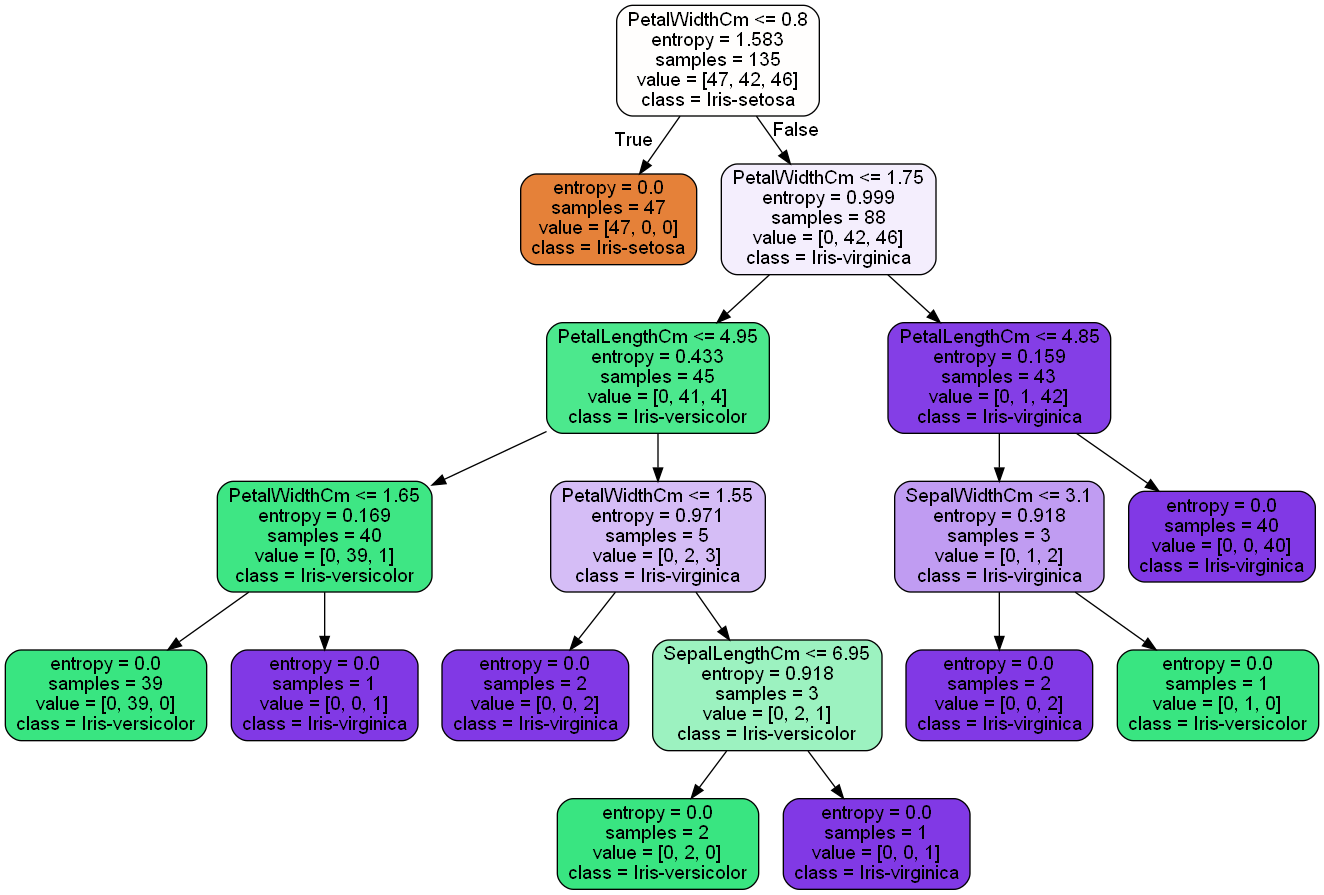

In [58]:
(graph,) = pydot.graph_from_dot_file('decision_tree02.dot')
graph.write_png('decision_tree02.png')
Image(filename ='decision_tree02.png')

# Performance Evaluation

Confusion Matrix is a 2D Matrix, depicts the count values actual value vs predicted values. It is used for calculating the other performance evaluation metrics like accuracy score, precision score, recall score.
[[3 0 0]
 [0 8 0]
 [0 0 4]]


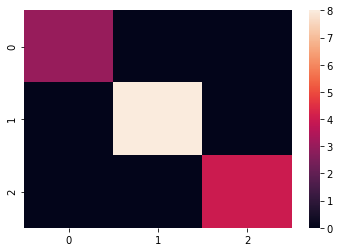

In [88]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix is a 2D Matrix, depicts the count values actual value vs predicted values. It is used for calculating the other performance evaluation metrics like accuracy score, precision score, recall score.')
print(cm)
g= sns.heatmap(cm) #plotting confusion matrix using heatmap


In [80]:
print('Accuracy score : ', accuracy_score(y_test,y_pred))
print('Precision Score: ', precision_score(y_test,y_pred, average=None))
print('Recall score: ', recall_score(y_test,y_pred, average=None))

Accuracy score :  1.0
Precision Score:  [1. 1. 1.]
Recall score:  [1. 1. 1.]


### I was successfully completed the Decision Tree algorithm using Iris dataset. 

# Thank You